Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting (use %matplotlib inline).

Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.

## 1. Stochastic Gradient Descent (SGD) (10 points)
Given a non-linear model with 4 coefficients $w_0, w_1, w_2, w_3$,

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2. $$ 

i) Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). (5 points)

ii) To visualise the evolution of weight coefficients and error as a function of epochs for different learning rates, for each learning rate, plot the value of weight coefficients against epoch number and in another figure plot error (MSE) against epoch number. (5 points) 

In [4]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('(4)SGD_samples.csv')
X = df.drop('y', axis=1)
y = df['y']

def sgradient_descent(X, y, lr, n_epoch, batch_size=1):
    w0 = np.random.randn()
    w1 = np.random.randn()
    w2 = np.random.randn()
    w3 = np.random.randn()
    log, mse = [], []
    
    for epoch in range(n_epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        Xs = X.iloc[indexes]
        ys = y.iloc[indexes]
        N = len(Xs)
        
        f = ys - (w0 + w1 * np.exp(-Xs.iloc[:, 0]) + w2 * Xs.iloc[:, 0] + w3 * Xs.iloc[:, 0] * Xs.iloc[:, 1])
        
        w1 -= lr * (-2 * np.exp(-Xs.iloc[:, 0]).dot(f).sum() / N)
        w2 -= lr * (-2 * Xs.iloc[:, 0].dot(f).sum() / N)
        w3 -= lr * (-2 * (Xs.iloc[:, 0] * Xs.iloc[:, 1]).dot(f).sum() / N)
        w0 -= lr * (-2 * f.sum() / N)
        
        log.append((w1, w2, w3, w0))
        mse.append(mean_squared_error(y, w0 + w1 * np.exp(-X.iloc[:, 0]) + w2 * X.iloc[:, 0] + w3 * X.iloc[:, 0] * X.iloc[:, 1]))
        
    return w0, w1, w2, w3, log, mse

w0, w1, w2, w3, log, mse = sgradient_descent(X, y, lr=0.01, n_epoch=100, batch_size=2)


To visualise the evolution of weight coefficients and error as a function of epochs for different learning rates, for each learning rate, plot the value of weight coefficients against epoch number and in another figure plot error (MSE) against epoch number.

MSE: 0.03350881275149813


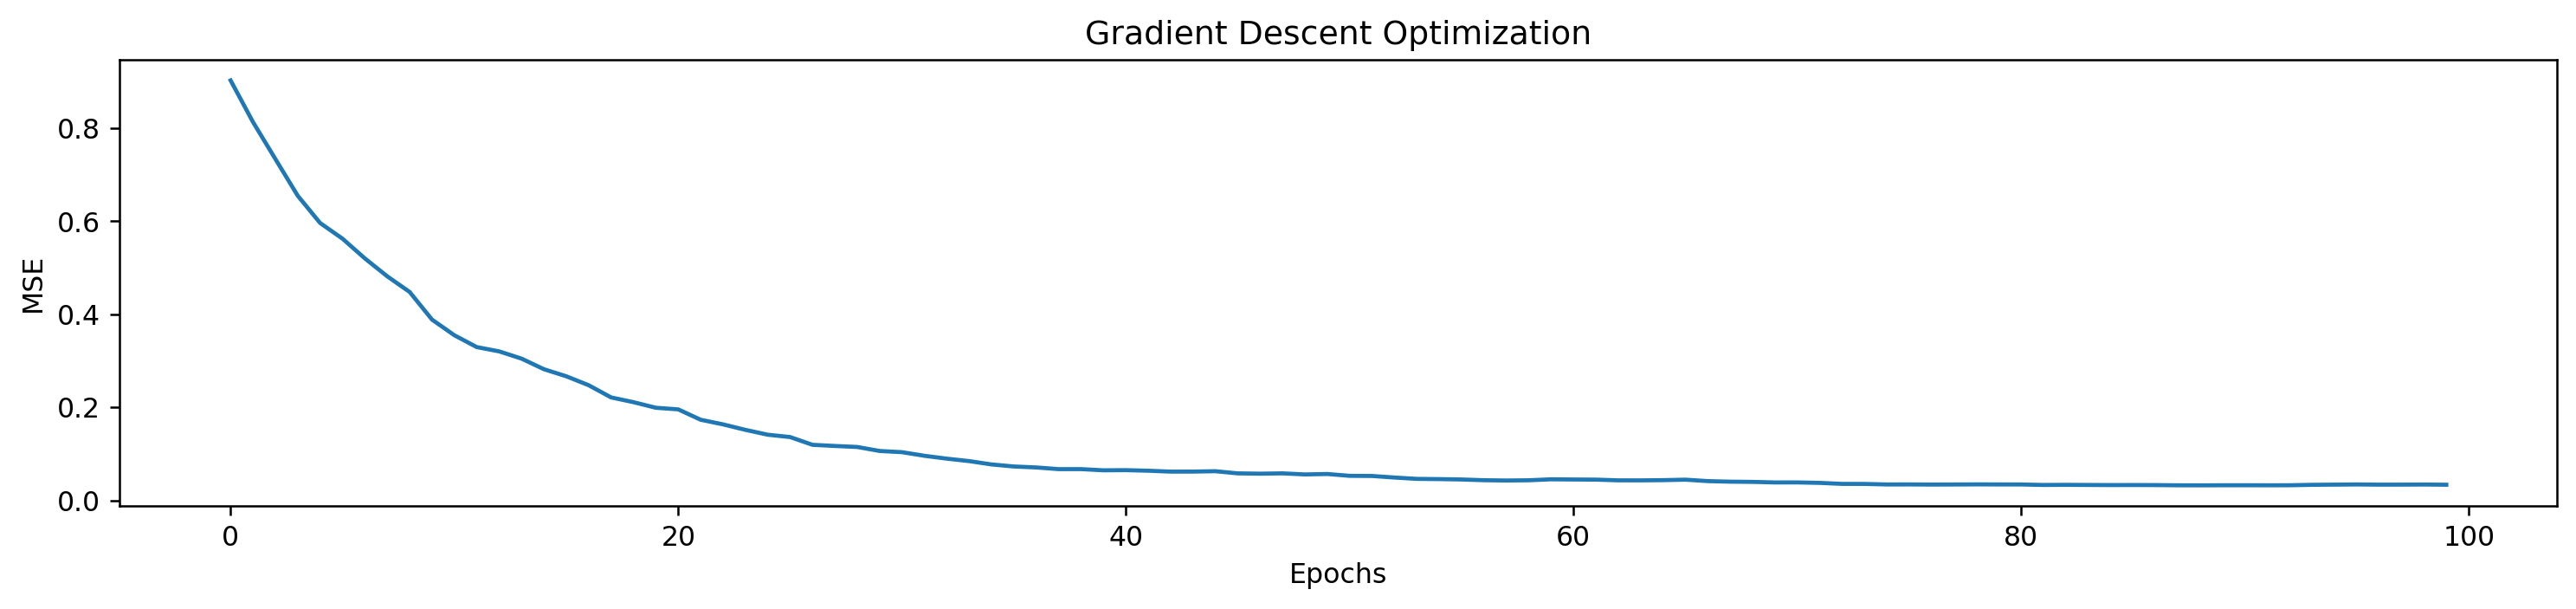

In [18]:
y_pred = (w0 + w1 * np.exp(-X.iloc[:, 0]) + w2 * X.iloc[:, 0] + w3 * X.iloc[:, 0] * X.iloc[:, 1])

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

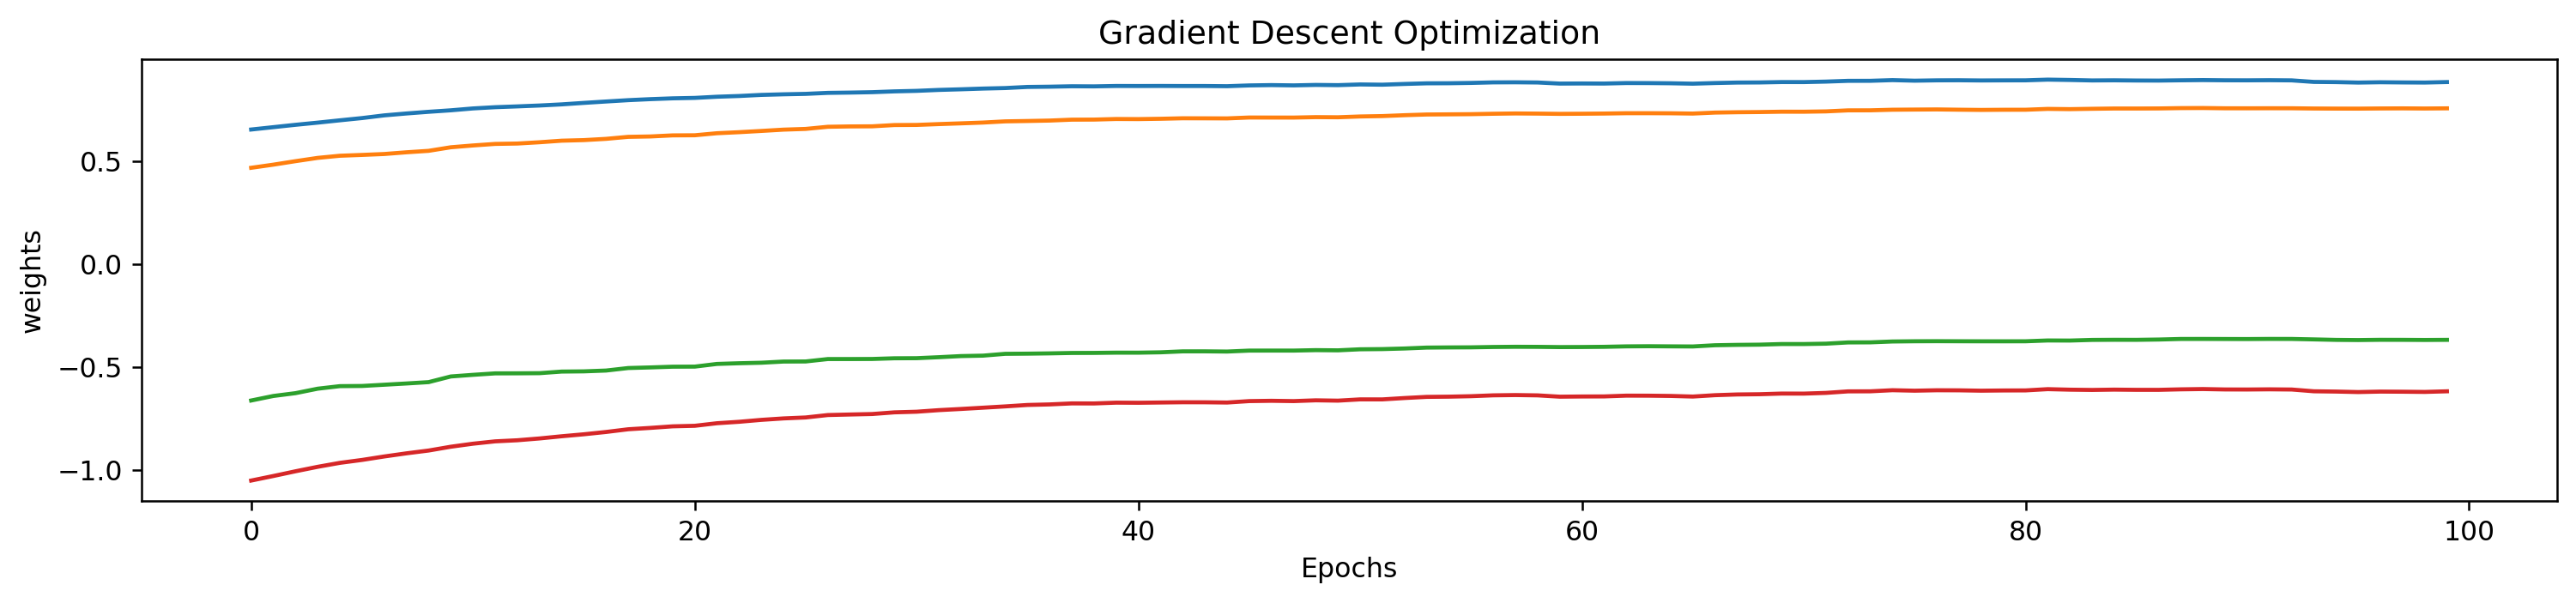

In [19]:
plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(log)), log)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('weights')
plt.show()